<a href="https://colab.research.google.com/github/sammyfow/cap-comp215/blob/2024.01/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
Name: Sam Fowler

Start Date: 02/05/2024

End Date:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque as dq

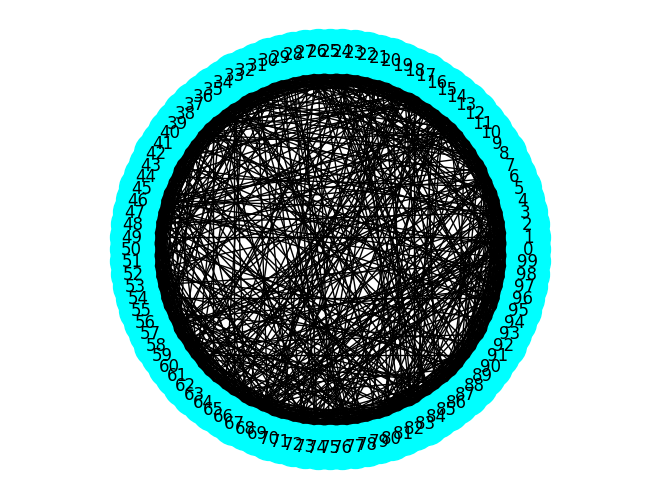

1.595959595959596
1.595959595959596
(0.33177877431119457, 1.848080808080808)


In [34]:


example = np.logspace(1, 10, 10)
#nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


def better_pairs(nodes):
  for i, u in enumerate(nodes):
    for j, v in enumerate(nodes):
      if i > j:
        yield u, v


def make_complete_graph(n):
  points = range(n)
  graph = nx.Graph()
  graph.add_nodes_from(points)
  graph.add_edges_from(better_pairs(points))
  return graph


def reachable_nodes(graph, start):
  seen = set()
  queue = dq([start])
  while queue:
      node = queue.popleft()
      if node not in seen:
          seen.add(node)
          queue.extend(graph.neighbours(node))
  return seen


def is_complete(g):
  start = next(iter(g))
  reachable = reachable_nodes(g, start)
  return len(g) == len(reachable)


def adjecent_edges(n, k):
  nodes = range(n)
  for i in nodes:
    for j in range(k // 2):
      yield i, (i + j + 1) % n


def make_ring_lattice(n, k):
  g = nx.Graph()
  nodes = range(n)
  g.add_nodes_from(nodes)
  g.add_edges_from(adjecent_edges(n, k))
  return g


def rewire(g, p):
  nodes = set(g)
  for a, b in g.edges():
    if np.random.random() < p:
      choices = nodes - {a} - set(g[a])
      new_b = np.random.choice(list(choices))
      g.remove_edge(a, b)
      g.add_edge(a, new_b)
  return g


def make_ws_graph(n, k, p):
  ws = rewire(make_ring_lattice(n, k), p)
  return ws


def node_clustering(G, node):
  neighbours = list(G[node])
  k = len(neighbours)
  if k < 2:
    return np.nan
  possible = k * (k - 1) / 2
  edges = 0
  for a, b in better_pairs(neighbours):
    if G.has_edge(a, b):
      edges +=1
  return edges / possible


def clustering_coefficient(G):
  cluster = [node_clustering(G, node) for node in list(G)]
  return np.nanmean(cluster)


def path_lengths(G):
  lengths = []
  for a in list(G):
    for b in list(G):
      if a !=b:
        lengths.append(nx.shortest_path_length(G, source=a, target=b))
  return lengths


def shortest_path_dijkstra(g, source):
  dist = {source: 0}
  queue = dq([source])
  while queue:
    node  = queue.popleft()
    new_dist = dist[node] + 1
    neighbours = set(g[node]).difference(dist)
    for n in neighbours:
      dist[n] = new_dist
    queue.extend(neighbours)
  return dist


def mean_dijkstra(g):
  lengths = []
  seen = set()
  for node in g.nodes():
    seen.add(node)
    dists = shortest_path_dijkstra(g, node)
    for i in dists:
      if i not in seen:
        lengths.append(dists[i])
  return np.mean(lengths)


def mean_shortest_path(G):
  lengths = path_lengths(G)
  mean = np.mean(lengths)
  return mean


def run_single_graph(n, k, p):
  ws = make_ws_graph(n, k, p)
  cc = clustering_coefficient(ws)
  msp = mean_dijkstra(ws)
  return cc, msp

ps = np.logspace(-5, 0, 10)
def run_experiment(n, k, iters):
  results = []
  for p in ps:
    trials = [run_single_graph(n, k, p) for t in range(iters)]
    means = np.array(trials).mean(axis=0)
    results.append(means)
  return np.array(results)


lattice = make_ws_graph(100, 40, 0.2)
nx.draw_circular(lattice,
                 node_color='cyan',
                 node_size=1000,
                 with_labels=True)
plt.axis('equal')
plt.show()







print(mean_dijkstra(lattice))
print(mean_shortest_path(lattice))
print(run_single_graph(100, 20, 0.3))
#print(run_single_graph(12, 4, 0.3))
#print(run_experiment(100, 30, 10))